In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv('Student_Grade.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [15]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [16]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [17]:
df.sample()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
89,CS-97090,D+,B,D+,C-,D,B,D,C-,B-,...,C,C-,C,B-,A-,A,D+,C,A-,2.363


In [18]:
df.shape

(571, 43)

In [19]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [20]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [22]:
df.isnull()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [48]:
le=LabelEncoder()
df['CS-412']=le.fit_transform(df['CS-412'])
df['CS-412']
le=LabelEncoder()
df['CS-423']=le.fit_transform(df['CS-423'])
df['CS-423']
le=LabelEncoder()
df['CS-419']=le.fit_transform(df['CS-419'])
df['CS-419']
le=LabelEncoder()
df['CS-414']=le.fit_transform(df['CS-414'])
df['CS-414']
le=LabelEncoder()
df['CS-406']=le.fit_transform(df['CS-406'])
df['CS-406']
le=LabelEncoder()
df['CS-421']=le.fit_transform(df['CS-421'])
df['CS-421']
le=LabelEncoder()
df['CS-403']=le.fit_transform(df['CS-403'])
df['CS-403']
le=LabelEncoder()
df['CS-317']=le.fit_transform(df['CS-317'])
df['CS-317']
le=LabelEncoder()
df['CS-312']=le.fit_transform(df['CS-312'])
df['CS-312']
le=LabelEncoder()
df['CS-306']=le.fit_transform(df['CS-306'])
df['CS-306']
le=LabelEncoder()
df['CS-318']=le.fit_transform(df['CS-318'])
df['CS-318']
le=LabelEncoder()
df['EL-332']=le.fit_transform(df['EL-332'])
df['EL-332']
le=LabelEncoder()
df['PH-121']=le.fit_transform(df['PH-121'])
df['PH-121']
le=LabelEncoder()
df['HS-101']=le.fit_transform(df['HS-101'])
df['HS-101']

0      10
1       9
2       3
3       7
4       2
       ..
566     0
567     0
568     0
569     4
570     9
Name: HS-101, Length: 571, dtype: int32

In [49]:
df.describe()

,PH-121,HS-101,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,4.302977,5.080560,4.280210,4.299475,4.982487,3.663748,5.595447,4.770578,2.693520,4.084063,4.211909,4.570928,2.954888
std,3.046895,2.785317,3.101382,3.147902,3.049638,3.580108,2.927134,3.128656,2.916243,4.565881,2.931189,2.656988,3.040475,4.085464,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,6.000000,7.000000,6.000000,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,12.000000,11.000000,13.000000,14.000000,13.000000,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


In [50]:
df.skew()

PH-121    0.549104
HS-101    0.053303
EL-332    0.587335
CS-318    0.511718
CS-306    0.575364
CS-312    0.561465
CS-317    0.273812
CS-403    0.638689
CS-421    0.317459
CS-406    1.105583
CS-414    1.592209
CS-419    0.773674
CS-423    0.627219
CS-412    1.086028
CGPA     -0.497203
dtype: float64

In [55]:
dfcor=df.corr()
dfcor

,PH-121,HS-101,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.493454,0.522597,0.543959,0.140798,0.499998,0.410585,0.383521,0.429313,0.264933,0.529531,0.199127,0.563519,-0.663135
HS-101,0.382436,1.000000,0.405491,0.434339,0.455731,0.244502,0.369839,0.265502,0.336850,0.103657,0.257124,0.309970,0.265646,0.251702,-0.537170
EL-332,0.493454,0.405491,1.000000,0.609555,0.708856,0.498697,0.651463,0.467233,0.625374,0.233004,0.569699,0.591753,0.620724,0.433554,-0.803475
CS-318,0.522597,0.434339,0.609555,1.000000,0.640191,0.261562,0.583151,0.374164,0.455528,0.316207,0.474213,0.478481,0.409538,0.507565,-0.660106
CS-306,0.543959,0.455731,0.708856,0.640191,1.000000,0.378431,0.708854,0.480976,0.602398,0.312556,0.616658,0.584059,0.549851,0.482368,-0.783624
CS-312,0.140798,0.244502,0.498697,0.261562,0.378431,1.000000,0.536722,0.568483,0.665625,-0.093349,0.283272,0.497901,0.594200,0.000164,-0.562341
CS-317,0.499998,0.369839,0.651463,0.583151,0.708854,0.536722,1.000000,0.607778,0.675953,0.257771,0.461690,0.678948,0.606970,0.417183,-0.800771
CS-403,0.410585,0.265502,0.467233,0.374164,0.480976,0.568483,0.607778,1.000000,0.610180,0.067050,0.216777,0.662082,0.446810,0.260593,-0.657128
CS-421,0.383521,0.336850,0.625374,0.455528,0.602398,0.665625,0.675953,0.610180,1.000000,0.173921,0.465932,0.626595,0.608017,0.301260,-0.742041
CS-406,0.429313,0.103657,0.233004,0.316207,0.312556,-0.093349,0.257771,0.067050,0.173921,1.000000,0.294138,0.266670,0.027898,0.287586,-0.280626


<AxesSubplot:>

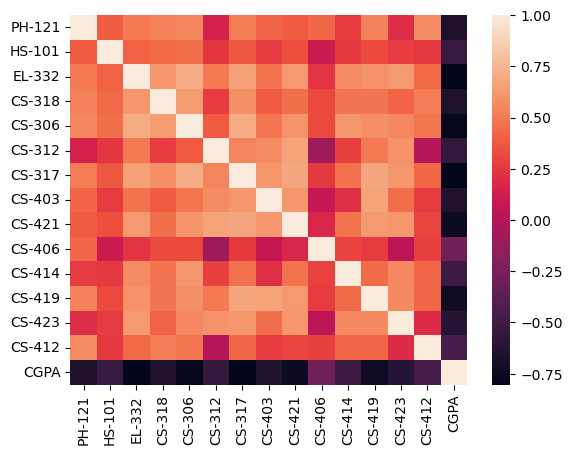

In [56]:
sns.heatmap(dfcor)

<AxesSubplot:>

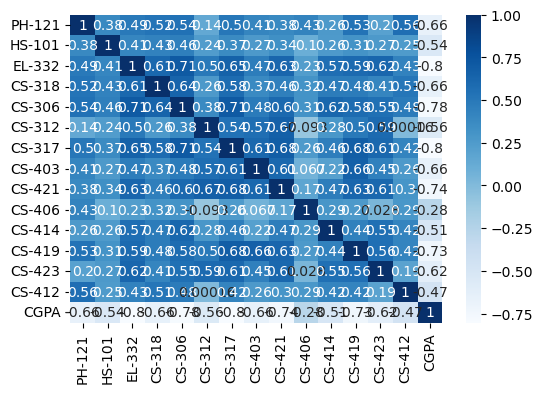

In [57]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:>

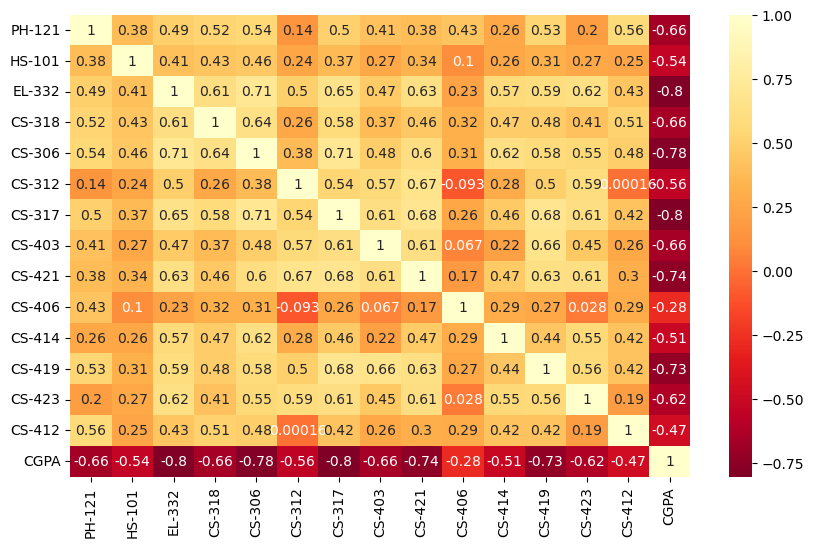

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [59]:
x=df.iloc[:,0:-1]
x

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,CS-97001,5,10,C-,C,C-,D+,D,C-,B-,...,6,8,8,8,8,2,0,8,3,2
1,CS-97002,0,9,D+,D,B-,C,D,A,D+,...,9,10,9,6,9,2,5,6,6,3
2,CS-97003,0,3,A,B-,B+,A,B-,B+,A-,...,2,3,3,0,6,0,0,0,2,0
3,CS-97004,9,7,D+,D,D,A-,D+,C-,D,...,8,10,6,10,8,5,3,7,7,7
4,CS-97005,2,2,A-,B+,A,A,A-,B+,A,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,3,0,A,A-,A+,A,A-,A-,A+,...,4,2,2,0,0,0,4,4,3,0
567,CS-97568,1,0,A,A,A,A,A,A-,A,...,2,4,4,0,0,2,3,2,6,2
568,CS-97569,3,0,A-,B+,A,A,A,A,A,...,4,2,3,0,4,0,6,4,2,2
569,CS-97570,0,4,D,A,D,D+,B-,C-,B-,...,4,9,3,3,8,9,6,3,5,6


In [60]:
y=df.iloc[:,-1]
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [62]:
x_train.shape

(382, 42)

In [63]:
y_train.shape

(382,)

In [64]:
x_test.shape

(189, 42)

In [65]:
y_test.shape

(189,)

In [66]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
lm.fit(x_train,y_train)